In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px


In [67]:
data = pd.read_csv('2021_Building_Energy_Benchmarking.csv')

In [68]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

C:\Users\maxpl\AppData\Local\Temp\ipykernel_24116\1794321463.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

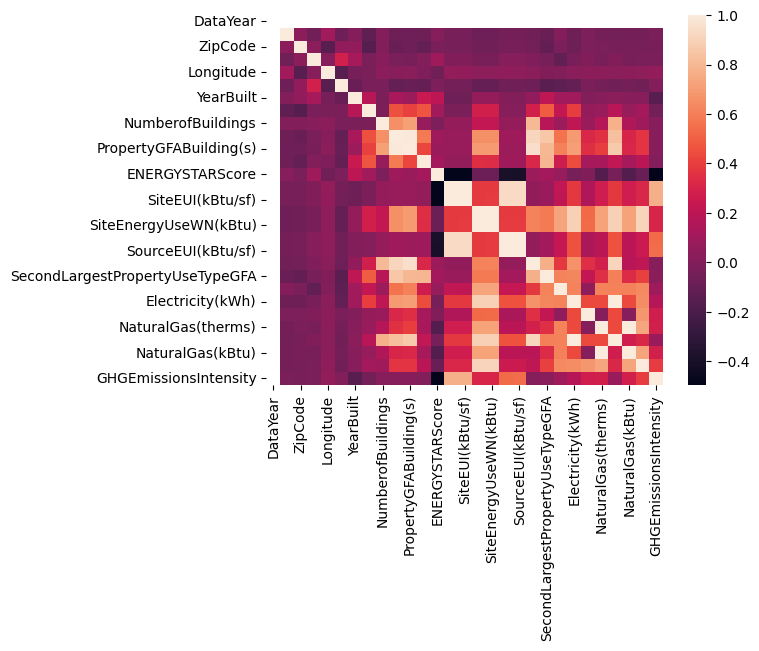

In [70]:
sns.heatmap(data.corr())

In [44]:
data = data[['BuildingType','OSEBuildingID','YearBuilt','ZipCode','Electricity(kWh)','PropertyGFATotal','ENERGYSTARScore']]

In [45]:
data.describe()

,YearBuilt,ZipCode,Electricity(kWh),PropertyGFATotal,ENERGYSTARScore
count,3601.000000,3546.000000,3.503000e+03,3.601000e+03,2553.000000
mean,1973.157456,98116.629724,9.468902e+05,1.070763e+05,73.232276
std,34.789269,17.039279,2.639922e+06,2.346923e+05,25.697856
min,1896.000000,98101.000000,0.000000e+00,2.000000e+04,1.000000
25%,1953.000000,98105.000000,1.787300e+05,2.961900e+04,60.000000
50%,1980.000000,98112.000000,3.327620e+05,4.725800e+04,82.000000
75%,2002.000000,98122.000000,7.793565e+05,1.010460e+05,93.000000
max,2021.000000,98199.000000,7.925876e+07,9.320156e+06,100.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BuildingType      3601 non-null   object 
 1   OSEBuildingID     3663 non-null   object 
 2   YearBuilt         3601 non-null   float64
 3   ZipCode           3546 non-null   float64
 4   Electricity(kWh)  3503 non-null   float64
 5   PropertyGFATotal  3601 non-null   float64
 6   ENERGYSTARScore   2553 non-null   float64
dtypes: float64(5), object(2)
memory usage: 200.4+ KB


In [47]:
data.dropna(inplace=True)
data.isnull().sum()

BuildingType        0
OSEBuildingID       0
YearBuilt           0
ZipCode             0
Electricity(kWh)    0
PropertyGFATotal    0
ENERGYSTARScore     0
dtype: int64

In [48]:
data.columns

Index(['BuildingType', 'OSEBuildingID', 'YearBuilt', 'ZipCode',
       'Electricity(kWh)', 'PropertyGFATotal', 'ENERGYSTARScore'],
      dtype='object')

In [49]:
data.head()

,BuildingType,OSEBuildingID,YearBuilt,ZipCode,Electricity(kWh),PropertyGFATotal,ENERGYSTARScore
0,NonResidential,1,1927.0,98101.0,944955.0,88434.0,78.0
1,NonResidential,2,1996.0,98101.0,657478.0,103566.0,96.0
2,NonResidential,3,1969.0,98101.0,8673722.0,956110.0,96.0
3,NonResidential,5,1926.0,98101.0,509497.0,61320.0,76.0
4,NonResidential,8,1980.0,98121.0,1333597.0,175580.0,90.0


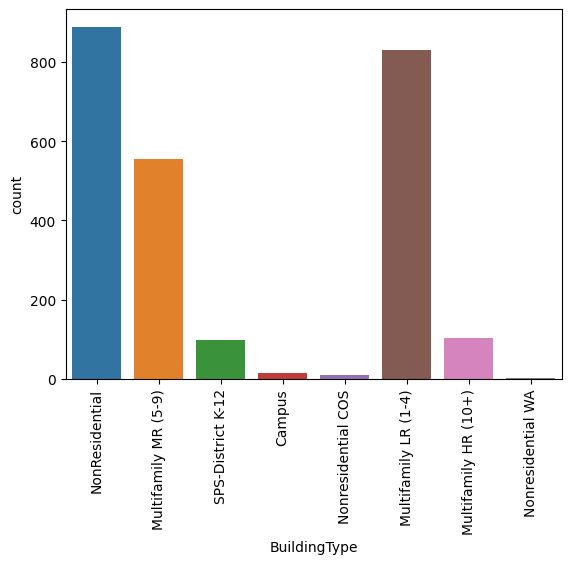

In [50]:
sns.countplot(data = data, x = 'BuildingType')
plt.xticks(rotation=90)
plt.show()

# Retirer data Campus ect car pas assez de données ou améliorer le cleaning

<AxesSubplot: xlabel='YearBuilt', ylabel='OSEBuildingID'>

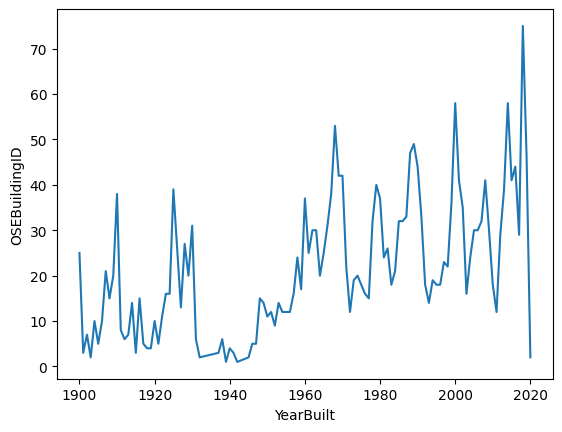

In [51]:
sns.lineplot(x="YearBuilt", y="OSEBuildingID", data=data.groupby('YearBuilt').count().reset_index())

C:\Users\maxpl\AppData\Local\Temp\ipykernel_24116\2757064541.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<AxesSubplot: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

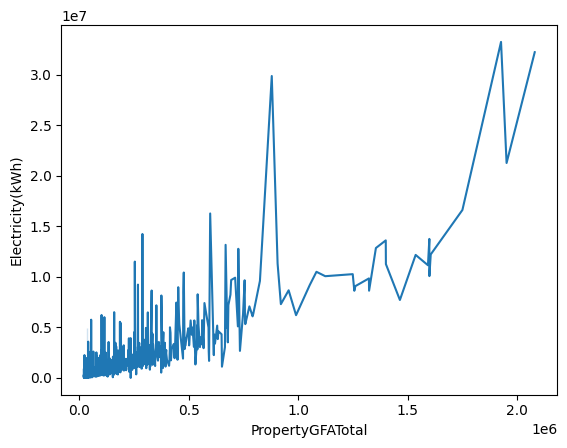

In [52]:
sns.lineplot(x="PropertyGFATotal", y="Electricity(kWh)", data=data.groupby('Electricity(kWh)').mean().reset_index())

In [53]:
data.drop(columns=['BuildingType'], inplace=True)

In [54]:
data.describe()

,YearBuilt,ZipCode,Electricity(kWh),PropertyGFATotal,ENERGYSTARScore
count,2503.000000,2503.000000,2.503000e+03,2.503000e+03,2503.000000
mean,1975.060328,98116.489013,9.044083e+05,1.089733e+05,72.964043
std,32.991242,16.963324,1.955196e+06,1.772989e+05,25.742117
min,1900.000000,98101.000000,2.800000e+01,2.001000e+04,1.000000
25%,1959.000000,98105.000000,1.979780e+05,3.090450e+04,60.000000
50%,1981.000000,98112.000000,3.587840e+05,5.035600e+04,81.000000
75%,2002.000000,98122.000000,8.058025e+05,1.084230e+05,93.000000
max,2020.000000,98199.000000,3.326167e+07,2.080885e+06,100.000000


In [55]:
from sklearn.neighbors import LocalOutlierFactor

estimator = LocalOutlierFactor(100)

result = estimator.fit_predict(data)

data_filtred = data.loc[result == 1]
print(data_filtred.describe())
px.scatter(data_frame = data_filtred["PropertyGFATotal"])

         YearBuilt       ZipCode  Electricity(kWh)  PropertyGFATotal  \
count  2306.000000   2306.000000      2.306000e+03       2306.000000   
mean   1974.487424  98116.761925      6.510975e+05      87028.761058   
std      32.807836     17.192975      7.683522e+05      98038.148418   
min    1900.000000  98101.000000      1.860800e+04      20010.000000   
25%    1959.000000  98105.000000      1.980838e+05      30221.000000   
50%    1980.000000  98115.000000      3.611715e+05      47184.500000   
75%    2001.000000  98122.000000      7.613610e+05      97462.750000   
max    2020.000000  98199.000000      4.952700e+06     733533.000000   

       ENERGYSTARScore  
count      2306.000000  
mean         72.727233  
std          25.715441  
min           1.000000  
25%          60.000000  
50%          81.000000  
75%          93.000000  
max         100.000000  


<AxesSubplot: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

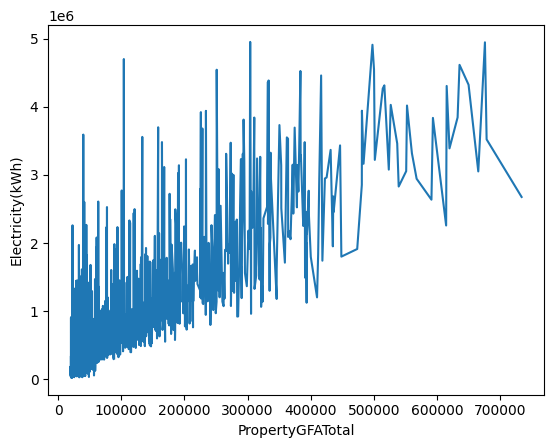

In [56]:
sns.lineplot(x="PropertyGFATotal", y="Electricity(kWh)", data=data_filtred)
# Pas beau mais peut etre fait sur Power BI pour plus beau

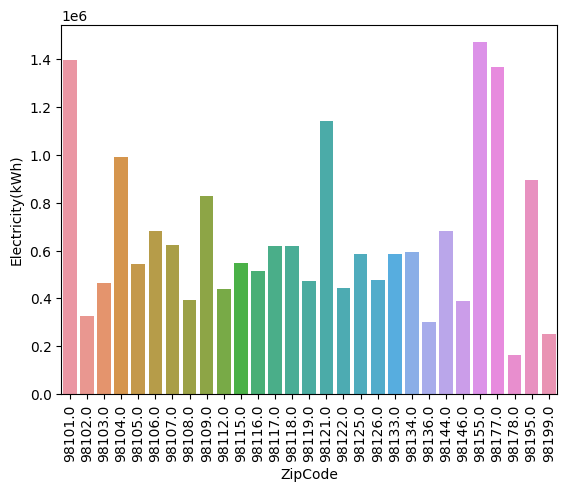

In [57]:
sns.barplot(data=data_filtred, x = 'ZipCode', y = 'Electricity(kWh)',errorbar=None)
plt.xticks(rotation=90)
plt.show()  

In [58]:
X = data.drop(columns=['Electricity(kWh)','OSEBuildingID'])
y = data["Electricity(kWh)"]

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

In [60]:
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# model.fit(X_train, y_train)
# model.score(X_train, X_train)

In [61]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'n_neighbors': np.arange(1, 20),
#               'metric': ['euclidean', 'manhattan']}

# grid = GridSearchCV(KNeighborsClassifier(n_neighbors=5), param_grid,cv=3)

# grid.fit(X_train, y_train)

In [62]:
print(X_train.head())
print(y_train.head())

      YearBuilt  ZipCode  PropertyGFATotal  ENERGYSTARScore
1370     1990.0  98119.0           46800.0             94.0
3157     2013.0  98119.0           21762.0             99.0
1645     1999.0  98133.0           29810.0             67.0
2059     1928.0  98102.0           40800.0             83.0
3310     2014.0  98103.0          126823.0             96.0
1370    272349.0
3157    206963.0
1645    621456.0
2059    103974.0
3310    915966.0
Name: Electricity(kWh), dtype: float64


C:\Users\maxpl\AppData\Local\Temp\ipykernel_24116\1119197534.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

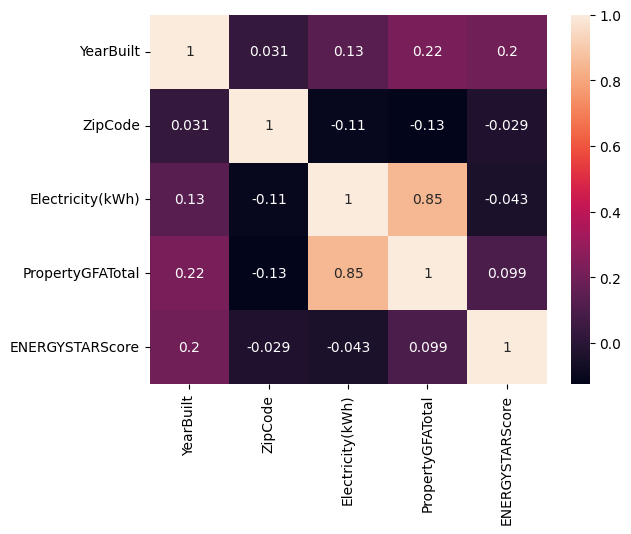

In [63]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

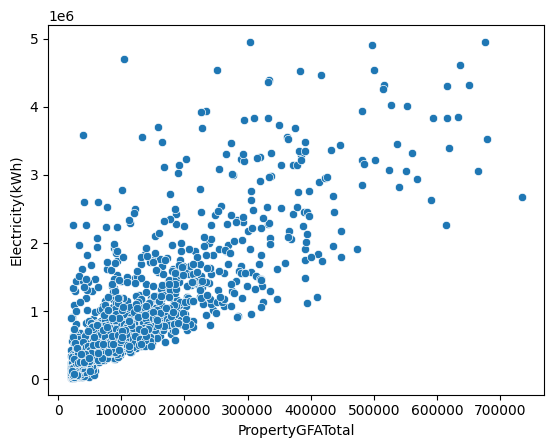

In [64]:
sns.scatterplot(data=data_filtred, x="PropertyGFATotal", y="Electricity(kWh)")

In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = np.array(data_filtred["PropertyGFATotal"]).reshape(-1, 1)
y = data_filtred["Electricity(kWh)"]
model.fit(X,y)
model.score(X,y)

0.7121001920625172